Global UFO Sightings Map

This map visualizes reported UFO sightings worldwide, highlighting both individual reports and regions of higher activity. The design uses a dark basemap (CartoDB.DarkMatter) to evoke a night-sky aesthetic, emphasizing the mysterious and extraterrestrial theme. Light blue and cyan markers provide contrast against the dark background while maintaining the sci-fi vibe.

Design Considerations:
- A dark theme for the basemap to resemble a night sky.
- Use of a light blue glow (#d6f5ff) to create a subtle, ethereal effect for areas with multiple sightings.
- Legends and titles styled to match the futuristic theme, with white text and serif fonts for readability and professionalism.

Goal: To combine aesthetics with informative visualization, focusing on the spatial distribution of UFO reports and clustering patterns.

In [5]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import Point
import geopandas as gpd


file_path = '/Users/MacyTrout/Desktop/R Studio Files/30 day map challenge/UFO/scrubbed.csv'
ufo_data = pd.read_csv(file_path, low_memory=False)


ufo_data.columns = ufo_data.columns.str.strip() 

ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'], errors='coerce')
ufo_data['longitude'] = pd.to_numeric(ufo_data['longitude'], errors='coerce')


ufo_data = ufo_data.dropna(subset=['latitude', 'longitude'])


ufo_data['geometry'] = ufo_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
ufo_gdf = gpd.GeoDataFrame(ufo_data, geometry='geometry', crs="EPSG:4326")

/var/folders/41/93fvfx5910ldvs4p20rv5w540000gn/T/ipykernel_24311/3048396364.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


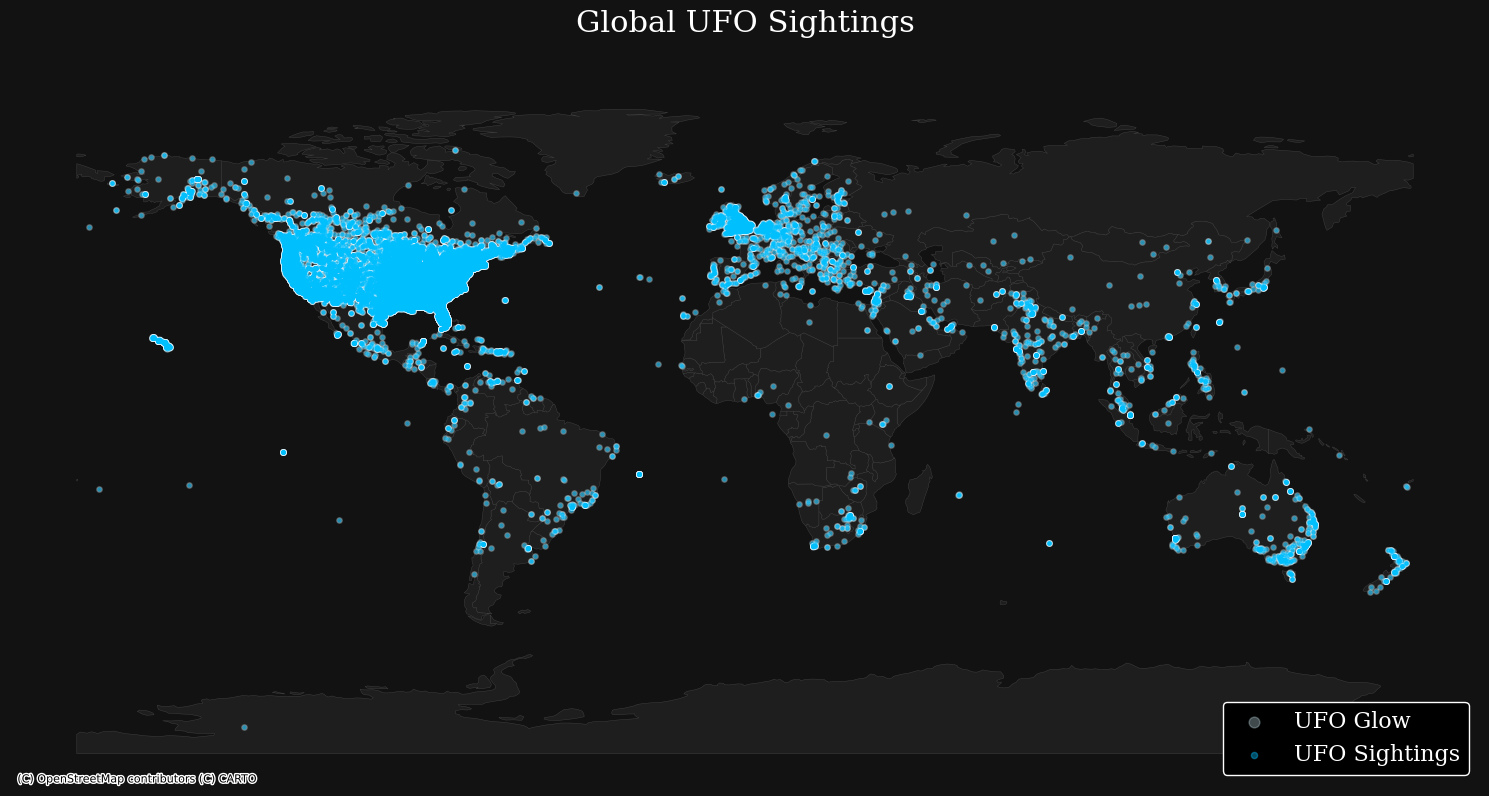

In [39]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fig, ax = plt.subplots(figsize=(15, 10))


world.plot(ax=ax, color='#1e1e1e', edgecolor='#444444', linewidth=0.3)


ufo_gdf.plot(ax=ax, markersize=15, color='#d6f5ff', alpha=0.3, label='UFO Glow')
ufo_gdf.plot(ax=ax, markersize=5, color='deepskyblue', alpha=0.4, label='UFO Sightings')


ctx.add_basemap(ax, crs=ufo_gdf.crs.to_string(), source=ctx.providers.CartoDB.DarkMatter)


fig.suptitle('Global UFO Sightings', fontsize=22, color='white', y=0.90, fontfamily='serif')


legend = ax.legend(
    loc='lower right', 
    fontsize=16,
    facecolor='black', 
    edgecolor='white', 
    framealpha=1, 
    markerscale=2
)

for text in legend.get_texts():
    text.set_fontfamily('serif')
    text.set_color("white")

ax.axis('off')


fig.patch.set_facecolor('#121212')


plt.tight_layout()
plt.show()